In [1]:
#Imported the necessary libraries for data manipulation, SQLite database connection,
# numerical operations, CSV handling, and plotting using matplotlib.
import pandas as pd
import sqlite3
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Establishing a connection to an SQLite database named "im.db" using the sqlite3 library.
conn = sqlite3.connect("im.db")

In [5]:
#Executed an SQL query to select all rows from the "movie_basics" table in the SQLite database
# and stored the results in a pandas DataFrame named movie_basics_df.
query = "SELECT * FROM movie_basics "
movie_basics_df = pd.read_sql_query(query, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
movie_basics_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [7]:
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [8]:
movie_basics_df = movie_basics_df[["movie_id", "start_year", "runtime_minutes", "genres"]]
movie_basics_df

,movie_id,start_year,runtime_minutes,genres
0,tt0063540,2013,175.0,"Action,Crime,Drama"
1,tt0066787,2019,114.0,"Biography,Drama"
2,tt0069049,2018,122.0,Drama
3,tt0069204,2018,NaN,"Comedy,Drama"
4,tt0100275,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...
146139,tt9916538,2019,123.0,Drama
146140,tt9916622,2015,NaN,Documentary
146141,tt9916706,2013,NaN,Comedy
146142,tt9916730,2017,116.0,None


In [9]:
mean_runtime = movie_basics_df["runtime_minutes"].mean()
mean_runtime

86.18724706088021

In [10]:
movie_basics_df["runtime_minutes"].fillna(mean_runtime, inplace=True)

In [11]:
movie_basics_df["genres"].fillna("Unknown", inplace=True)

In [12]:
movie_basics_df.tail()

,movie_id,start_year,runtime_minutes,genres
146139,tt9916538,2019,123.000000,Drama
146140,tt9916622,2015,86.187247,Documentary
146141,tt9916706,2013,86.187247,Comedy
146142,tt9916730,2017,116.000000,Unknown
146143,tt9916754,2013,86.187247,Documentary


In [13]:
random_rows = movie_basics_df.sample(n=10)
random_rows

,movie_id,start_year,runtime_minutes,genres
115091,tt6820038,2016,86.187247,Documentary
53273,tt3139756,2014,99.000000,"Horror,Thriller"
82679,tt4769500,2015,86.187247,"Action,Adventure,Family"
102347,tt5989336,2018,92.000000,Horror
132994,tt8333052,2018,87.000000,Horror
41044,tt2468218,2012,50.000000,Documentary
141244,tt9204606,2019,40.000000,Documentary
120107,tt7227454,2017,45.000000,Documentary
103996,tt6090188,2017,75.000000,Documentary
104255,tt6099358,2018,86.187247,Comedy


In [14]:
null_counts = movie_basics_df.isnull().sum()
null_counts

movie_id           0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

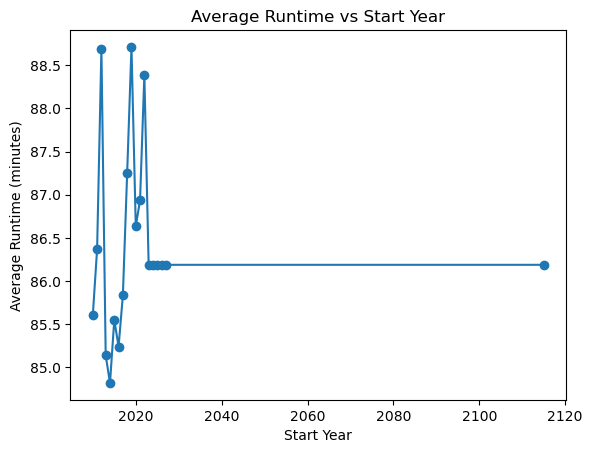

In [15]:

# Group the data by start year and calculate the average runtime
avg_runtime = movie_basics_df.groupby("start_year")["runtime_minutes"].mean()

# Create the line plot
avg_runtime.plot(kind="line", marker="o")

# Set labels and title
plt.xlabel("Start Year")
plt.ylabel("Average Runtime (minutes)")
plt.title("Average Runtime vs Start Year")

# Show the plot
plt.show()


In [16]:
#Filtering the movie_basics_df DataFrame based on the conditions that the "runtime_minutes" column should be less than or equal to 3600
# and the "start_year" column should be less than or equal to 2023.
movie_basics_df = movie_basics_df[(movie_basics_df["runtime_minutes"] <= 3600) & (movie_basics_df["start_year"] <= 2023)]

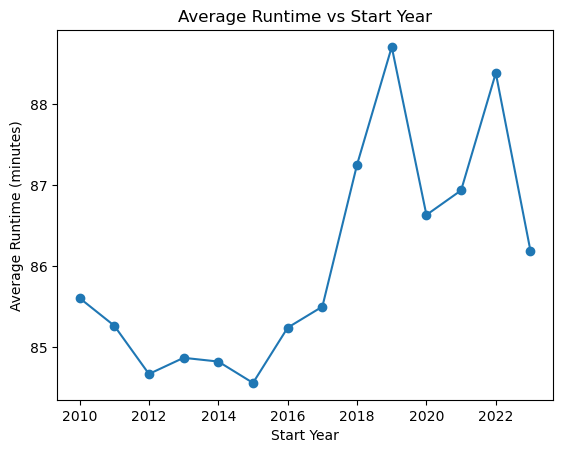

In [17]:
# Group the data by start year and calculate the average runtime
avg_runtime = movie_basics_df.groupby("start_year")["runtime_minutes"].mean()

# Create the line plot
avg_runtime.plot(kind="line", marker="o")

# Set labels and title
plt.xlabel("Start Year")
plt.ylabel("Average Runtime (minutes)")
plt.title("Average Runtime vs Start Year")

# Show the plot
plt.show()

In [18]:
query = "SELECT * FROM movie_ratings "
movie_ratings_df = pd.read_sql_query(query, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [19]:
movie_ratings_null_counts = movie_ratings_df.isnull().sum()
movie_ratings_null_counts

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [20]:
unique_genres = movie_basics_df["genres"].unique()
unique_genres

array(['Action,Crime,Drama', 'Biography,Drama', 'Drama', ...,
       'Music,Musical,Reality-TV', 'Animation,Crime',
       'Adventure,History,War'], dtype=object)

In [21]:
num_unique_genres = movie_basics_df["genres"].nunique()
num_unique_genres

1086

In [22]:
import csv
bom_movie_df = pd.read_csv("bom.movie_gross.csv")
bom_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
bom_movie_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [24]:
random_rows = bom_movie_df.sample(n=10)
random_rows

,title,studio,domestic_gross,foreign_gross,year
1883,Cinderella (2015),BV,201200000.0,342400000,2015
2085,Cake,CLF,2000000.0,NaN,2015
2742,Magnus,FR,8900.0,NaN,2016
1843,The Decent One,KL,21300.0,NaN,2014
2001,Self/Less,Focus,12300000.0,18200000,2015
497,Desert Flower,NGE,44300.0,14600000,2011
731,Ice Age: Continental Drift,Fox,161300000.0,715900000,2012
2447,Snowden,ORF,21600000.0,15700000,2016
36,Eat Pray Love,Sony,80600000.0,124000000,2010
645,The Black Power Mix Tape: 1967-1975,IFC,274000.0,NaN,2011


In [25]:
bom_movie_null_counts = bom_movie_df.isnull().sum()
bom_movie_null_counts

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [26]:
mean_domestic_gross = bom_movie_df["domestic_gross"].mean()
mean_domestic_gross

28745845.06698422

In [27]:
query = """
SELECT *
FROM movie_ratings
JOIN movie_basics ON movie_ratings.movie_id = movie_basics.movie_id
"""
movie_basic_and_rating_df = pd.read_sql_query(query, conn)

In [31]:
movie_basic_and_rating_df.head()

,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"


In [32]:
movie_basic_and_rating_df = movie_basic_and_rating_df[["movie_id", "averagerating", "numvotes", "original_title", "start_year", "runtime_minutes", "genres"]]
movie_basic_and_rating_df.head()

,movie_id,averagerating,numvotes,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,2011,73.0,"Mystery,Thriller"


The genres that resonate well with audiences, the runtime preferences, and potentially uncovering any relationships between ratings, votes, and box office performance.

In [34]:
# Group the dataset by genres and calculate the average rating
genre_ratings = movie_basic_and_rating_df.groupby("genres")["averagerating"].mean()

# Sort the genres based on average rating in descending order
sorted_genres = genre_ratings.sort_values(ascending=False)

# Select the genres with the highest ratings
highest_rated_genres = sorted_genres.head()

# Print the genres with the highest ratings
print(highest_rated_genres)

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
Name: averagerating, dtype: float64


In [44]:
# the maximum, minimum, and mean number of votes from the "numvotes"
# column of the DataFrame movie_basic_and_rating_df.
max_votes = movie_basic_and_rating_df["numvotes"].max()
min_votes = movie_basic_and_rating_df["numvotes"].min()
mean_votes = movie_basic_and_rating_df["numvotes"].mean()
print("Maximum number of votes:", max_votes)
print("Minimum number of votes:", min_votes)
print("Mean number of votes:", mean_votes)

Maximum number of votes: 1841066
Minimum number of votes: 5
Mean number of votes: 3523.6621669194105


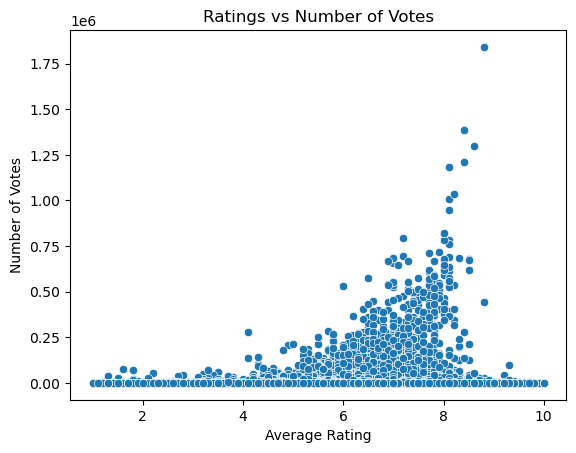

In [40]:
# Create a scatter plot of ratings vs number of votes using seaborn
sns.scatterplot(data=movie_basic_and_rating_df, x="averagerating", y="numvotes")

# Set the labels and title of the plot
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Ratings vs Number of Votes')

# Show the plot
plt.show()